## Procesamiento Datos Pandas

Complete el código faltante según corresponda a manera de lograr automatizar el flujo. Finalmente adjunte una imagen del envio de correo correspondiente.



El archivo candidates.csv contiene 50k filas de datos sobre candidatos. Los campos que estamos usando son:
- First Name
- Last Name
- Email
- Country
- Application Date
- Yoe (years of experience)
- Seniority
- Technology
- Code Challenge Score
- Technical Interview

In [1]:
#importing necessary modules
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

## 1. Almaceno sobre DB

In [ ]:
# lea el articulo:
# https://medium.com/analytics-vidhya/inserting-an-image-in-an-excel-file-using-pandas-and-sql-e88826680b05


In [2]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.4 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import pandas as pd
import xlsxwriter
import sqlite3
import os


DB = 'candidates.db'
TABLE_NAME = 'candidate'

In [4]:
def almacenar_pandas_to_sql(df: pd.DataFrame, database_name:str, table_name:str)->None:
  """Procesamiento datos candidatos para almacenarlos sobre db """

  # Renombrar las columnas del DataFrame eliminando los espacios en blanco.
  column_rename = {c: c.replace(' ', '') for c in df.columns}
  df.rename(column_rename,axis='columns', inplace=True)

  # Lanzar una excepción indicando que la implementación de guardar en la base de datos aún no se ha realizado.
  raise 'No se implemento bd' # debe implementar el guardado a la bd

  #Imprimir información sobre la cantidad de registros almacenados.
  sql_table_schema = f'{database_name}.{table_name}'
  cantidad_registros = df.shape[0]
  print(f'Se almacenaron {cantidad_registros} sobre tabla sql {sql_table_schema}')

In [6]:
# read csv
path = './src/candidates.csv'
df = pd.read_csv(path,sep=';')
df.shape

(50000, 10)

In [7]:
df.head(2)

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10


In [9]:
def almacenar_pandas_to_sql(df: pd.DataFrame, database_name: str, table_name: str) -> None:
    """Procesamiento datos candidatos para almacenarlos sobre db"""

    # Renombrar columnas eliminando espacios en blanco
    column_rename = {c: c.replace(' ', '') for c in df.columns}
    df.rename(column_rename, axis='columns', inplace=True)

    # Crear conexión a la base de datos SQLite
    conn = sqlite3.connect(database_name)

    # Almacenar DataFrame en la tabla de la base de datos
    df.to_sql(table_name, conn, if_exists='replace', index=False)

    # Cerrar la conexión
    conn.close()

    # Imprimir información sobre la cantidad de registros almacenados
    sql_table_schema = f'{database_name}.{table_name}'
    cantidad_registros = df.shape[0]
    print(f'Se almacenaron {cantidad_registros} registros sobre tabla SQL {sql_table_schema}')

# Llamar a la función para almacenar en SQLite
almacenar_pandas_to_sql(df, DB, TABLE_NAME)


Se almacenaron 50000 registros sobre tabla SQL candidates.db.candidate


## 2. Procesamiento Datos

Generar un reporte por separado para los paises ( 'United States of America', 'Brazil','Colombia','Ecuador') donde se deberá seleccionar a los candidatos cuyo CodeChallengeScore y TechnicalInterviewScore sea mayor igual a 7. Se deberá crear gráficos integrados sobre cada reporte y además almacenar los datos en un excel con el nombre de cada pais.

In [ ]:
# 1. Lectura de datos
with sqlite3.connect(DB) as conn:
  df = pd.read_sql_query(f'select * from {TABLE_NAME}', conn)

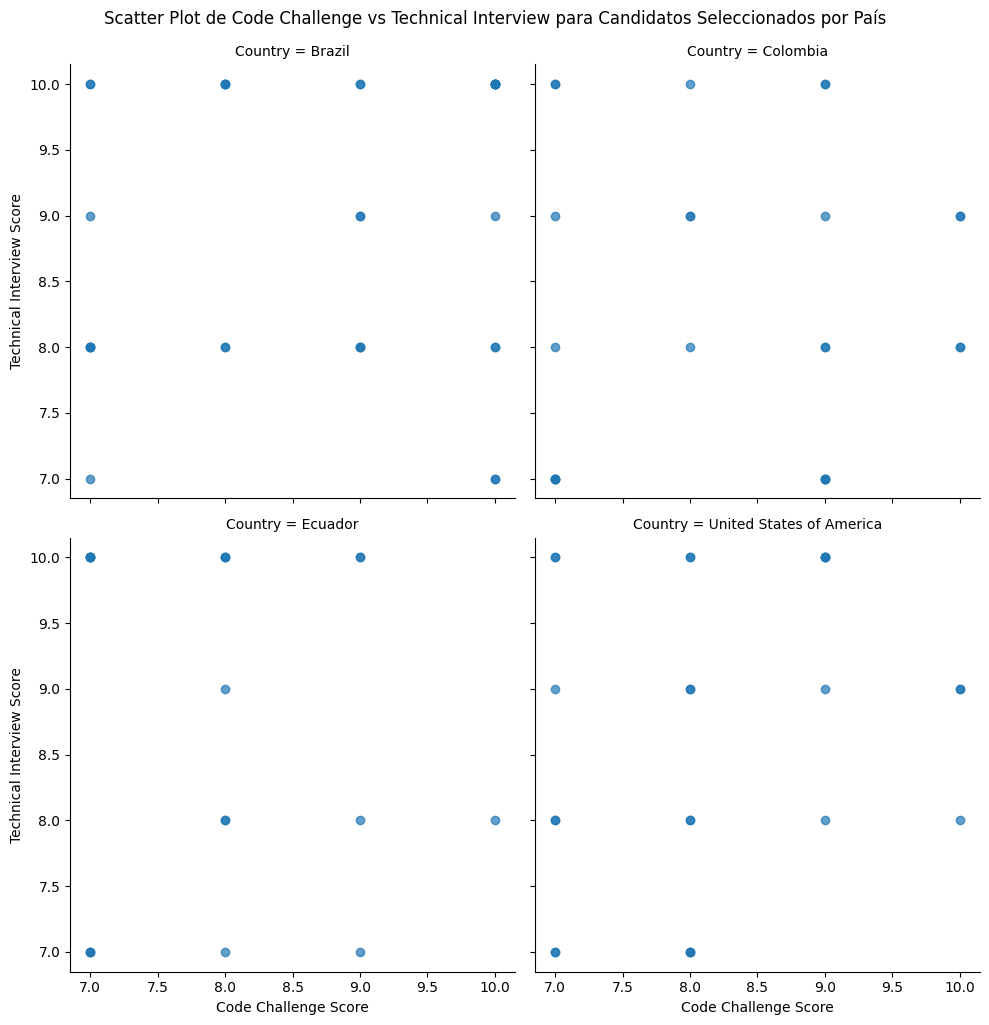

Datos almacenados en United States of America_reporte.xlsx
Datos almacenados en Brazil_reporte.xlsx
Datos almacenados en Colombia_reporte.xlsx
Datos almacenados en Ecuador_reporte.xlsx


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar por países
paises_seleccionados = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
df_paises = df[df['Country'].isin(paises_seleccionados)]

# Filtrar por puntajes
df_paises_filtrado = df_paises[(df_paises['CodeChallengeScore'] >= 7) & (df_paises['TechnicalInterviewScore'] >= 7)]

# Crear gráficos integrados para cada país
g = sns.FacetGrid(df_paises_filtrado, col='Country', col_wrap=2, height=5)
g.map(plt.scatter, 'CodeChallengeScore', 'TechnicalInterviewScore', alpha=0.7)
g.set_axis_labels('Code Challenge Score', 'Technical Interview Score')
g.fig.suptitle('Scatter Plot de Code Challenge vs Technical Interview para Candidatos Seleccionados por País', y=1.02)

# Mostrar gráficos
plt.show()

# Almacenar datos en archivos Excel por país
for pais in paises_seleccionados:
    df_pais_actual = df_paises_filtrado[df_paises_filtrado['Country'] == pais]
    excel_filename = f"{pais}_reporte.xlsx"
    df_pais_actual.to_excel(excel_filename, index=False)
    print(f"Datos almacenados en {excel_filename}")

In [11]:
df.head(2)

,FirstName,LastName,Email,ApplicationDate,Country,YOE,Seniority,Technology,CodeChallengeScore,TechnicalInterviewScore
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10


In [12]:
# Filtrar por países y puntajes
paises_seleccionados = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
filterDf = df[(df['Country'].isin(paises_seleccionados)) & (df['CodeChallengeScore'] >= 7) & (df['TechnicalInterviewScore'] >= 7)]

# Verificar la forma del DataFrame resultante
filterDf.shape

(103, 10)

In [13]:
filterDf.head(2)

,FirstName,LastName,Email,ApplicationDate,Country,YOE,Seniority,Technology,CodeChallengeScore,TechnicalInterviewScore
359,Johnathon,Stokes,gianni_macgyver@yahoo.com,2018-04-11,Brazil,16,Mid-Level,Salesforce,10,8
389,Khalid,Jenkins,cleo.mohr@gmail.com,2018-10-05,Colombia,13,Architect,Development - FullStack,9,7


<Axes: ylabel='Technology'>

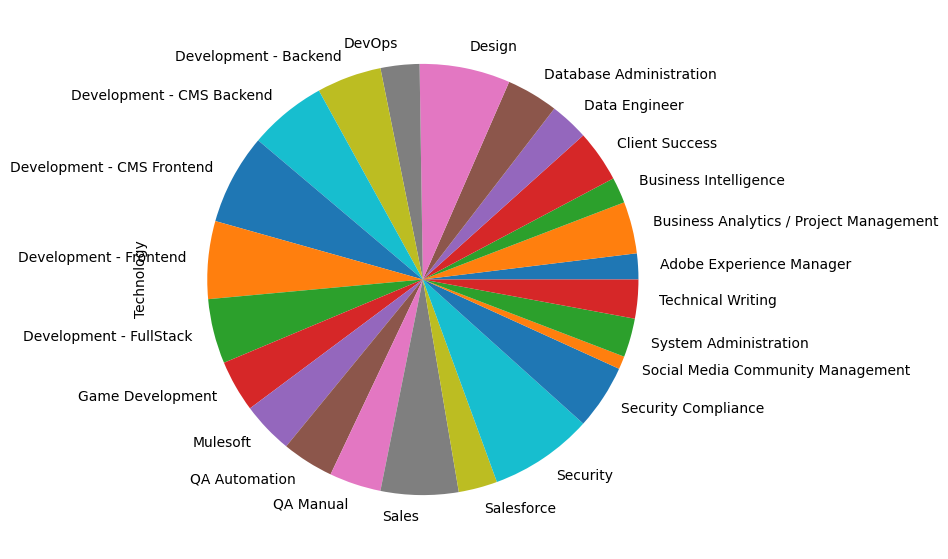

In [15]:
# - Hires by technology (pie chart)
tec = filterDf.groupby('Technology')['Technology'].count()
tec.plot.pie(figsize=(11, 7))

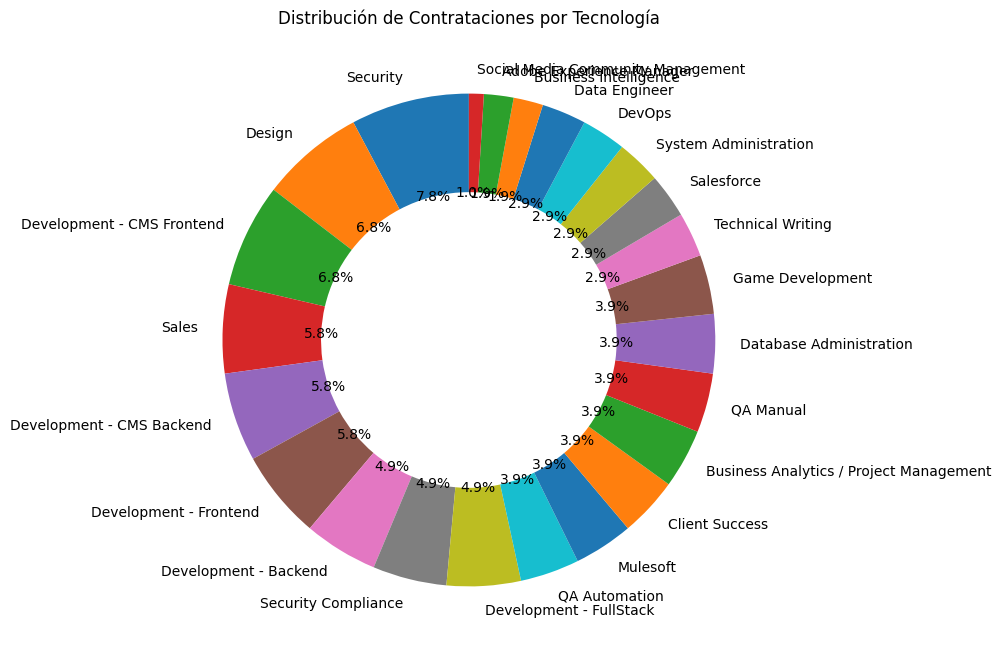

In [16]:
import matplotlib.pyplot as plt

# Contar las contrataciones por tecnología
tec = filterDf['Technology'].value_counts()

# Configurar el gráfico circular (pie chart)
fig, ax = plt.subplots(figsize=(10, 8))
tec.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, wedgeprops=dict(width=0.4))

# Añadir etiquetas y título
ax.set_title('Distribución de Contrataciones por Tecnología')
ax.set_ylabel('')  # Eliminar etiqueta del eje y

# Mostrar el gráfico
plt.show()


<Axes: xlabel='Seniority'>

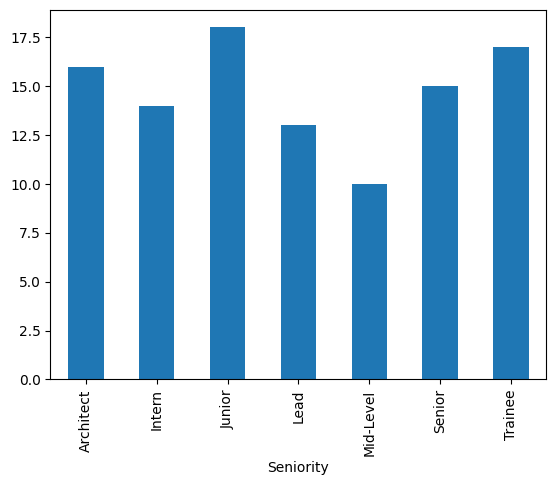

In [17]:
# - Hires by seniority (bar chart)
senority_group = filterDf.groupby('Seniority')['Seniority'].count()
senority_group.plot.bar()

/tmp/ipykernel_9000/3864836390.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seniority_counts.index, y=seniority_counts.values, palette='viridis')


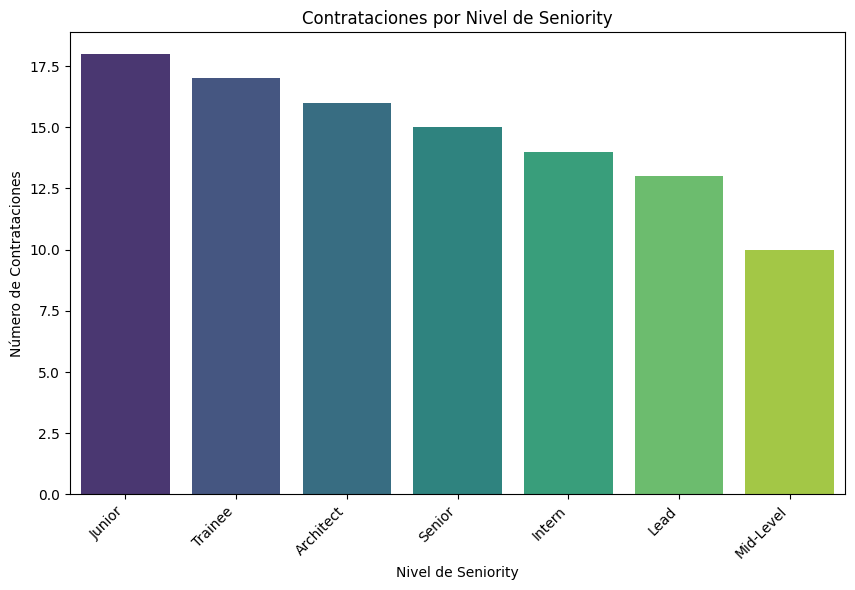

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las contrataciones por nivel de senioridad
seniority_counts = filterDf['Seniority'].value_counts()

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=seniority_counts.index, y=seniority_counts.values, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Nivel de Seniority')
plt.ylabel('Número de Contrataciones')
plt.title('Contrataciones por Nivel de Seniority')

# Rotar etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

### Realizo reporte automatizado

In [19]:
def genero_grafico_circular(df:pd.DataFrame, country:str)->None:
  """Funcion que se encarga de crear el gráfico en pie"""
  tec = df.groupby('Technology')['Technology'].count()
  tec.plot.pie(figsize=(11, 7))

  plt.savefig(f"./reportes/images/{country}/pie_chart.png",dpi=300, bbox_inches='tight')
  plt.close()
  print('Se genero gráfico circular ...')

In [20]:
def genero_grafico_barras(df:pd.DataFrame, country:str)->None:
  """Funcion que se encarga de crear el gráfico de barras"""

  senority_group = df.groupby('Seniority')['Seniority'].count()
  senority_group.plot.bar()

  plt.savefig(f"./reportes/images/{country}/bar_chart.png",dpi=300, bbox_inches='tight')
  plt.close()
  print('Se genero gráfico barras ...')

In [27]:
import os
import pandas as pd

# Función para crear directorios
def crear_directorios(*directorios):
    for directorio in directorios:
        if not os.path.exists(directorio):
            os.makedirs(directorio)

# Función para generar gráficos y reporte Excel por país
def generar_reporte_pais(df, country):
    # Filtrar DataFrame por país
    country_df = df[df['Country'] == country]

    # Crear subcarpetas y generar gráficos
    crear_directorios(f'./reportes/images/{country}')
    genero_grafico_circular(country_df, country)
    genero_grafico_barras(country_df, country)

    # Generar informe Excel por país
    with pd.ExcelWriter(f"./reportes/{country}.xlsx", engine="xlsxwriter") as excel_book:
        sheet_name = f"Report-{country}"
        country_df.to_excel(excel_book, index=False, sheet_name=sheet_name)

        # Posicionarse sobre hoja de Excel
        excel_sheet = excel_book.sheets[sheet_name]

        # Almacenar imágenes en el informe Excel
        image_pie_path = f"./reportes/images/{country}/pie_chart.png"


## 3. Envio Correo

In [2]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# Configuración del servidor y credenciales
import os 


smtp_server = 'smtp.gmail.com'  # Cambia esto al servidor SMTP que estés utilizando
smtp_port = 587  # Cambia esto al puerto adecuado
sender_email = 'pevuyauduze@gmail.com'
sender_password = 'uyaq tcpw lnum lxoq'

# Detalles del correo electrónico
receiver_email = 'retroestilo2@gmail.com'
subject = 'Envio Reporte Brasil'
body = 'Adjunto lo solicitado'

# Crear el objeto MIMEMultipart
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = subject
msg.attach(MIMEText(body, 'plain'))


# Adjuntar archivo
file_path = '/workspaces/PC005PythonDatux/Brazil_reporte.xlsx'
with open(file_path, 'rb') as file:
    attachment = MIMEApplication(file.read(), _subtype="xlsx")
    attachment.add_header('Content-Disposition', 'attachment', filename=file_path)
    msg.attach(attachment)
    
# Iniciar la conexión con el servidor SMTP
with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()  # Iniciar el modo seguro
    server.login(sender_email, sender_password)
    server.sendmail(sender_email, receiver_email, msg.as_string())

print('Correo enviado exitosamente')

Correo enviado exitosamente
